# Exploratory Data Analysis on FIFA 19

## Purpose and goals:

1. Understand the variables
2. Clean dataset
3. Analyze relationships between variables
4. Get and extract valuable insights
5. Test underlying assumptions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/fifa_eda.csv')

In [2]:
# taking a look at the first five rows in the dataset

df.head(5)

ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value  Wage\n(Pounds Weekly) Preferred Foot  \
0         FC Barcelona  110500.0                    565           Left   
1             Juventus   77000.0                    405          Right   
2  Paris Saint-Germain  118500.0                    290          Right   
3    Manchester United   72000.0                    260          Right   
4      Manchester City  102000.0                    355          Right   

   International Reputation  Skill Moves Position  Joined  \
0                       5.0          4.0       RF    2004   
1                       5.0          5.0       ST    2018   
2                       5.0          5.0       LW    2017   
3                       4.0          1.0       GK    2011   
4                       4.0          4.0      RCM    2015   

  Contract Valid Until    Height  Weight  Release Clause  
0           2021-01-01  5.583333   159.0        226500.0  
1           2022-01-01  6.166667   183.0        127100.0  
2           2022-01-01  5.750000   150.0        228100.0  
3           2020-01-01  6.333333   168.0        138600.0  
4           2023-01-01  5.916667   154.0        196400.0

In [3]:
print("This dataset has {} rows and {} columns".format(df.shape[0], df.shape[1])) # stating the # of rows and columns
df.columns # accessing the column names

This dataset has 18207 rows and 18 columns


Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage\n(Pounds Weekly)', 'Preferred Foot',
       'International Reputation', 'Skill Moves', 'Position', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'Release Clause'],
      dtype='object')

In [4]:
# understanding the different values for each variable

df.nunique(axis = 0)

ID                          18207
Name                        17194
Age                            29
Nationality                   164
Overall                        48
Potential                      47
Club                          651
Value                         216
Wage\n(Pounds Weekly)         144
Preferred Foot                  2
International Reputation        5
Skill Moves                     5
Position                       27
Joined                         22
Contract Valid Until           35
Height                         22
Weight                         58
Release Clause               1245
dtype: int64

In [5]:
# summarizing the mean, count, standard deviation, min, max for numeric variables

df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))) # applying a regular format instead of scientific notation

ID           Age       Overall     Potential          Value  \
count   18207.000000  18207.000000  18207.000000  18207.000000   17955.000000   
mean   214298.338606     25.122206     66.238699     71.307299    2444.530214   
std     29965.244204      4.669943      6.908930      6.136496    5626.715434   
min        16.000000     16.000000     46.000000     48.000000      10.000000   
25%    200315.500000     21.000000     62.000000     67.000000     325.000000   
50%    221759.000000     25.000000     66.000000     71.000000     700.000000   
75%    236529.500000     28.000000     71.000000     75.000000    2100.000000   
max    246620.000000     45.000000     94.000000     95.000000  118500.000000   

      Wage\n(Pounds Weekly) International Reputation   Skill Moves  \
count          18207.000000             18159.000000  18159.000000   
mean               9.731312                 1.113222      2.361308   
std               21.999290                 0.394031      0.756164   
min                0.000000                 1.000000      1.000000   
25%                1.000000                 1.000000      2.000000   
50%                3.000000                 1.000000      2.000000   
75%                9.000000                 1.000000      3.000000   
max              565.000000                 5.000000      5.000000   

             Joined        Height        Weight Release Clause  
count  18207.000000  18207.000000  18207.000000   18207.000000  
mean    2016.420607      5.946771    165.979129    4585.060971  
std        2.018194      0.220514     15.572775   10630.414430  
min     1991.000000      5.083333    110.000000      13.000000  
25%     2016.000000      5.750000    154.000000     570.000000  
50%     2017.000000      5.916667    165.000000    1300.000000  
75%     2018.000000      6.083333    176.000000    4585.060806  
max     2018.000000      6.750000    243.000000  228100.000000

In [6]:
df = df.rename({'Wage\n(Pounds Weekly)' : 'Weekly Wage'}, axis = 1) # renaming the wage column

## There is a large disparity between the min and max on the wage side

## --> 0 to 565

### Taking a deeper dive to see the unique values in the Weekly Wage column

In [8]:
df['Weekly Wage'].unique() # taking a look at a list of the different values under Weekly Wage

array([565, 405, 290, 260, 355, 340, 420, 455, 380,  94, 205, 125, 285,
       225, 145, 240, 315, 200, 130, 300, 215, 100, 255, 165, 265, 160,
       150, 245, 110,  77, 115, 210, 195, 230, 250, 135, 155, 180, 175,
       190, 185,  21,  82,  73,  92,  88,  96, 170,  66, 235,  28, 105,
        38,  81,  57,  15,  63,  22,  84, 120,  90,  72,  93,  45,  74,
        51,  42,  31,  75,  25, 140,  41,  78,  53,  95,  80,  43,  60,
        85,  64,  67,  18,  70,  91,  20,  49,  87,  86,  26,  29,  55,
        35,  33,  56,  30,  11,  59,  23,  46,  39,  32,  36,  98,  54,
        68,  58,  27,  40,  44,  19,   1,  61,  50,  99,  17,  52,  62,
        12,  10,  71,  14,  76,  48,  65,  69,  24,  34,  16,  37,  47,
        89,   0,  97,  79,  13,  83,   6,   3,   9,   8,   7,   4,   2,
         5], dtype=int64)

In [9]:
# checking for null values
# club, value and contract valid are in triple digits for null values

df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Weekly Wage                   0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [10]:
df = df.dropna(axis = 0) # removing any rows with null values

In [11]:
df.isnull().sum() # now the dataset looks like this

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Weekly Wage                 0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

In [12]:
# checking the data type for each attribute 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17907 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17907 non-null  int64  
 1   Name                      17907 non-null  object 
 2   Age                       17907 non-null  int64  
 3   Nationality               17907 non-null  object 
 4   Overall                   17907 non-null  int64  
 5   Potential                 17907 non-null  int64  
 6   Club                      17907 non-null  object 
 7   Value                     17907 non-null  float64
 8   Weekly Wage               17907 non-null  int64  
 9   Preferred Foot            17907 non-null  object 
 10  International Reputation  17907 non-null  float64
 11  Skill Moves               17907 non-null  float64
 12  Position                  17907 non-null  object 
 13  Joined                    17907 non-null  int64  
 14  Contra

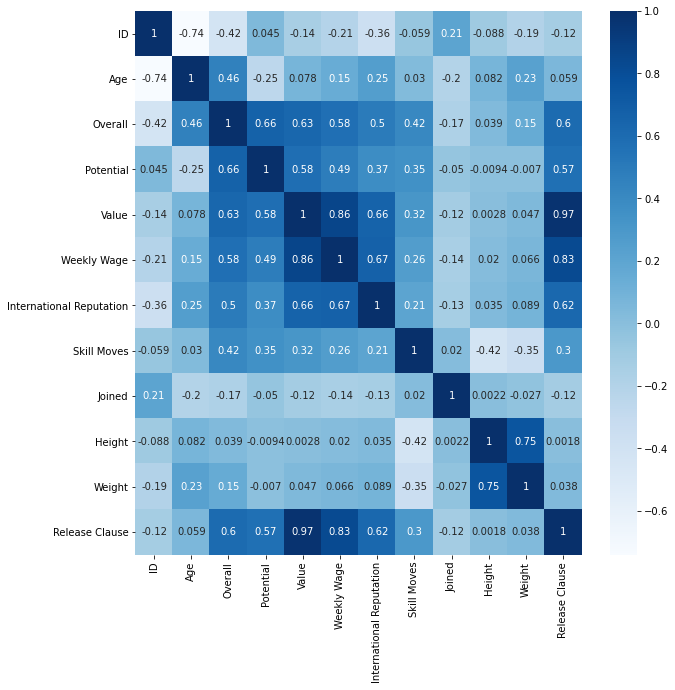

In [13]:
# checking the correlation between variables

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues'); # building the heatmap

# Exploration

## Questions to answer:

### International

1. How many unique countries compose the top 50 rated players?

    a) Are there countries that stand out amongst the rest?
    
2. Right footed vs. left footed?
3. For each country's top 20 rated players, what is the average age?

In [14]:
# taking a look at my dataset before exploring

df.head(5)

ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value  Weekly Wage Preferred Foot  \
0         FC Barcelona  110500.0          565           Left   
1             Juventus   77000.0          405          Right   
2  Paris Saint-Germain  118500.0          290          Right   
3    Manchester United   72000.0          260          Right   
4      Manchester City  102000.0          355          Right   

   International Reputation  Skill Moves Position  Joined  \
0                       5.0          4.0       RF    2004   
1                       5.0          5.0       ST    2018   
2                       5.0          5.0       LW    2017   
3                       4.0          1.0       GK    2011   
4                       4.0          4.0      RCM    2015   

  Contract Valid Until    Height  Weight  Release Clause  
0           2021-01-01  5.583333   159.0        226500.0  
1           2022-01-01  6.166667   183.0        127100.0  
2           2022-01-01  5.750000   150.0        228100.0  
3           2020-01-01  6.333333   168.0        138600.0  
4           2023-01-01  5.916667   154.0        196400.0

In [15]:
# passing a window function in dense rank that will rank the players in a descending manner based on overall rating
# important to mention: if there are two variables with same overall rating, they will get the same ranking
# passing the astype to switch the ranking from float to integer

df['player_rank'] = df['Overall'].rank(method = 'first', ascending = False).astype(int)

In [16]:
# checking the first five rows to ensure that the ranking worked

df['player_rank'].unique()

array([    1,     2,     3, ..., 17905, 17906, 17907])

In [17]:
df.head(5)

ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value  Weekly Wage Preferred Foot  \
0         FC Barcelona  110500.0          565           Left   
1             Juventus   77000.0          405          Right   
2  Paris Saint-Germain  118500.0          290          Right   
3    Manchester United   72000.0          260          Right   
4      Manchester City  102000.0          355          Right   

   International Reputation  Skill Moves Position  Joined  \
0                       5.0          4.0       RF    2004   
1                       5.0          5.0       ST    2018   
2                       5.0          5.0       LW    2017   
3                       4.0          1.0       GK    2011   
4                       4.0          4.0      RCM    2015   

  Contract Valid Until    Height  Weight  Release Clause  player_rank  
0           2021-01-01  5.583333   159.0        226500.0            1  
1           2022-01-01  6.166667   183.0        127100.0            2  
2           2022-01-01  5.750000   150.0        228100.0            3  
3           2020-01-01  6.333333   168.0        138600.0            4  
4           2023-01-01  5.916667   154.0        196400.0            5

In [18]:
# making a copy of the original dataset to explore the data further

dfn = df.copy()

#### Question 1: How many unique countries compose the top 50 rated players?

## Assumption Top 5:

1. France
2. Brazil
3. Belgium
4. Germany
5. Spain

In [29]:
# for the time being, removing all columns that are not necessary and filtering by the top 50 rated players overall

top_players = dfn[dfn['player_rank'] <= 50][['Name', 'Nationality', 'Overall', 'Weekly Wage', 'Preferred Foot']] 

In [30]:
# breaking down the number of players by country, their average weekly wage
# sorted by total_players descending

countries = top_players.groupby('Nationality').agg({'Overall': 'count', 'Weekly Wage': 'mean'}).reset_index().sort_values(by = 'Overall', ascending = False).rename({'Overall': 'total_players', 'Weekly Wage': 'Avg. Weekly Wage'}, axis = 1)
countries.head(5)

Nationality  total_players  Avg. Weekly Wage
17       Spain              6        300.833333
9       France              6        172.500000
0    Argentina              5        289.000000
2       Brazil              5        273.000000
12       Italy              4        143.000000

## Comparing Assumptions to Data

### Assumptions                    

1. France                                              
2. Brazil                                                
3. Belgium                                             
4. Germany                                            
5. Spain     



### Results

1. Spain
2. France
3. Argentina
4. Brazil
5. Italy


### 3/5 countries were in the top 5

<AxesSubplot:xlabel='total_players', ylabel='Nationality'>

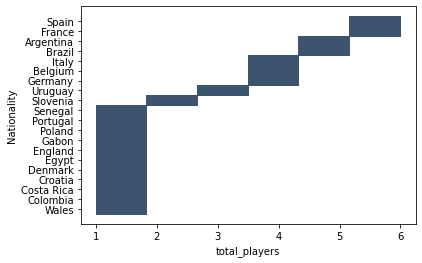

In [22]:
# building a histogram plot to visualize the breakdown of all unique countries and the total count of players

sns.histplot(x = countries['total_players'], y = countries['Nationality'], legend = True, element = 'step')

### Question 1: How many unique countries compose the top 50 rated players?

### Answer

In [28]:
print("{} countries compose the list for the top 50 players in FIFA 19.".format(countries['Nationality'].nunique()))

20 countries compose the list for the top 50 players in FIFA 19.


## Question 2: Right footed vs. left footed?

+ Break down for the top 50 players and overall

+ Assumptions: There will be more right footers than left footers in both the Top 50 and the entire dataset

In [34]:
### Let's start with the top 50 players

right_footers = top_players['Preferred Foot'].value_counts()[0]
left_footers = top_players['Preferred Foot'].value_counts()[1]

In [38]:
print("In the Top 50, the preferred foot count breakdown is {} for right foot and {} for left foot".format(right_footers, left_footers))

In the Top 50, the preferred foot count breakdown is 36 for right foot and 14 for left foot


## Question 3: For each country's top 20 rated players, what is the average age?

+ Use a window function to rank the players by their rating, and rank them by country
+ Filter out Top players by country
+ Use groupby function to get the average age

### Assumption: The average age for 70% of countries will be between 25 and 28

In [67]:
# Grouping data by Nationality and overall, ascending by country and overall rating descending, using the cumulative count, we will be able to get the top 20 players by country
# For those familiar with SQL, this is the equivalent of using the PARTITION BY function in the Window function

df['country_ranking'] = df.sort_values(['Nationality', 'Overall'], ascending = [True, False]).groupby(['Nationality']).cumcount() + 1

In [68]:
df = df[df['country_ranking'] <= 20]

In [72]:
## Ensuring that the players are being ranked 1-20 by country

df[df['Nationality'] == 'Costa Rica'].reset_index()

index      ID          Name  Age Nationality  Overall  Potential  \
0      46  193041      K. Navas   31  Costa Rica       87         87   
1     991  190799     C. Borges   30  Costa Rica       77         77   
2    1186  208379   G. González   30  Costa Rica       77         77   
3    1449  204713   J. Campbell   26  Costa Rica       76         77   
4    1644  212772     O. Duarte   29  Costa Rica       75         75   
5    2559  216811     K. Waston   30  Costa Rica       74         74   
6    3807  236999     D. Guzman   28  Costa Rica       72         73   
7    4090  232230  R. Matarrita   23  Costa Rica       71         78   
8    4206  213064      F. Calvo   25  Costa Rica       71         73   
9    4535  198335     B. Oviedo   28  Costa Rica       71         71   
10   4603  213718     B. Acosta   31  Costa Rica       71         71   
11   5171  229748     M. George   24  Costa Rica       70         75   
12   6197  198553     C. Gamboa   28  Costa Rica       69         69   
13   6378  207815       J. Ruiz   24  Costa Rica       69         74   
14   7200  202896      M. Ureña   28  Costa Rica       68         68   
15   7863  242737    E. Aguilar   26  Costa Rica       67         68   
16   7996  241743     U. Segura   25  Costa Rica       67         70   
17   8106  242533   J. Cascante   24  Costa Rica       67         72   
18   8178  221050    W. Francis   27  Costa Rica       67         67   
19   8318  198040   E. Alvarado   29  Costa Rica       67         67   

                      Club    Value  Weekly Wage  ...  \
0              Real Madrid  30500.0          195  ...   
1               Göztepe SK   6500.0           24  ...   
2                  Bologna   6500.0           30  ...   
3                Frosinone   9000.0           19  ...   
4             RCD Espanyol   5000.0           24  ...   
5   Vancouver Whitecaps FC   4200.0            7  ...   
6         Portland Timbers   2800.0            6  ...   
7         New York City FC   2800.0            5  ...   
8      Minnesota United FC   2400.0            5  ...   
9               Sunderland   1900.0            9  ...   
10                SK Brann   1600.0            4  ...   
11          FC Midtjylland   2400.0           12  ...   
12                  Celtic    825.0           22  ...   
13                Al Fayha   1400.0            9  ...   
14          Los Angeles FC    925.0            4  ...   
15       Incheon United FC    875.0            2  ...   
16               DC United    950.0            3  ...   
17        Portland Timbers    875.0            2  ...   
18     Seattle Sounders FC    625.0            3  ...   
19             Trabzonspor    525.0            8  ...   

   International Reputation  Skill Moves  Position Joined  \
0                       3.0          1.0        GK   2014   
1                       2.0          3.0       LDM   2018   
2                       1.0          2.0       RCB   2017   
3                       2.0          4.0        LF   2018   
4                       1.0          2.0        CB   2016   
5                       1.0          2.0       RCB   2014   
6                       1.0          3.0        CM   2016   
7                       1.0          3.0        LB   2016   
8                       1.0          2.0        LB   2017   
9                       2.0          3.0        LB   2017   
10                      1.0          2.0       LCB   2015   
11                      1.0          3.0        ST   2018   
12                      1.0          3.0        RB   2016   
13                      1.0          3.0        RM   2017   
14                      1.0          3.0        ST   2017   
15                      1.0          4.0        CM   2018   
16                      1.0          3.0        CM   2018   
17                      1.0          2.0       LCB   2018   
18                      1.0          2.0        LB   2018   
19                      1.0          1.0        GK   2015   

    Contrac

In [76]:
## Now creating a groupby Nationality and getting the mean age by country

top_20 = df.groupby('Nationality').mean()['Age'].reset_index().sort_values(by = 'Age', ascending = True)

In [88]:
# changing the data type from float to integer

top_20['Age'] = top_20['Age'].astype(int)

In [93]:
# Finding out how many countries we have in total

print("There are {} total countries with top 20 players to measure the average age.".format(len(top_20['Age'])))

There are 163 total countries with top 20 players to measure the average age.


In [96]:
# Filtering out to count how many countries have an average age of 25 to 28 with their top 20 players

print("There are {} total countries that have an average age between 25 to 28 with their Top 20 players.".format(top_20[top_20['Age'].between(25,28)].count()['Age']))

There are 114 total countries that have an average age between 25 to 28 with their Top 20 players.


In [101]:
percentround(top_20[top_20['Age'].between(25,28)].count()/len(top_20['Age']) * 100,1)['Age']

69.9